In [1]:
%matplotlib notebook
import numpy as np
from scipy.integrate import odeint, quad
from scipy.optimize import brentq
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import seaborn as sbs
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 20})
#rc('text', usetex=True)
#rc('animation', html='jshtml')
#plt.rcParams["animation.html"] = "jshtml"

In [2]:
def deriv(X, t, omega, gamma, alpha, delta, beta):
    """Return the derivatives dx/dt and d2x/dt2."""
    
    #dVdx = lambda x: x**3 - x
    x, xdot = X
    xdotdot = gamma*np.cos(omega*t) - delta*xdot + alpha*x - beta*x*x*x
    return xdot, xdotdot

def solve_duffing(tmax, dt_per_period, t_trans, x0, v0, params):
    """Solve the Duffing equation for parameters gamma, delta, omega.
    
    Find the numerical solution to the Duffing equation using a suitable
    time grid: tmax is the maximum time (s) to integrate to; t_trans is
    the initial time period of transient behaviour until the solution
    settles down (if it does) to some kind of periodic motion (these data
    points are dropped) and dt_per_period is the number of time samples
    (of duration dt) to include per period of the driving motion (frequency
    omega).
    
    Returns the time grid, t (after t_trans), position, x, and velocity,
    xdot, dt, and step, the number of array points per period of the driving
    motion.
    
    """
    # Time point spacings and the time grid

    omega, gamma, alpha, delta, beta = params
    period = 2*np.pi/omega
    dt = 2*np.pi/omega / dt_per_period
    step = int(period / dt)
    t = np.arange(0, tmax, dt)
    # Initial conditions: x, xdot
    X0 = [x0, v0]
    X = odeint(deriv, X0, t, args=params)
    idx = int(t_trans / dt)
    return t[idx:], X[idx:], dt, step

In [3]:
# Set up the motion for a oscillator with initial position
# x0 and initially at rest.
x0, v0 = 1, 0.1
tmax, t_trans = 10000, 100
dt_per_period = 500

omega = 1.0
gamma = 0.4
alpha = 1.0
delta = 0.1
beta = 1.0

omega = 1.4
gamma, delta = 0.4, 0.1


params = (omega, gamma, alpha, delta, beta)
xs = []

In [4]:
# Solve the equation of motion.
params = (omega, gamma, alpha, delta, 0.01)
t, X, dt, pstep = solve_duffing(tmax, dt_per_period, t_trans, x0, v0, params)
x, xdot = X.T
xs.append(x)
print(t.shape)
print(x.shape)

(1102945,)
(1102945,)


In [5]:
# Solve the equation of motion.
#params = (omega, gamma, 1.2, delta, 0.1)
#t, X, dt, pstep = solve_duffing(tmax, dt_per_period, t_trans, x0, v0, params)
#x, xdot = X.T
#xs.append(x)
#print(t.shape)
#print(x.shape)

In [6]:
# Solve the equation of motion.
params = (omega, gamma, alpha, delta, 1.0)
t, X, dt, pstep = solve_duffing(tmax, dt_per_period, t_trans, x0, v0, params)
x, xdot = X.T
xs.append(x)
print(t.shape)
print(x.shape)

(1102945,)
(1102945,)


In [7]:
def tsanim(tss):
    "Plot an array of time series data t, x = [ti], [xi]."
    nrows = len(tss)
    fig, axes = plt.subplots(nrows=nrows, ncols=1)
    tsmax = lambda ts: max(len(ts[0]), len(ts[1]))
    ts_maxlen = max(map(tsmax, tss))
    tinit = int(0.1*ts_maxlen)
    print("Animate time series from t=%d with %d frames" % (tinit, ts_maxlen))

    def tsplot(ax, ts):
        t, x = ts
        ax.set_ylabel(r'$x [\mathrm{m}]$')
        ax.set_ylim(np.min(x), np.max(x))
        line, = ax.plot(t[:tinit], x[:tinit])
        return line
    
    lines = list(map(lambda axts: tsplot(*axts), zip(axes, tss)))
    axes[-1].set_xlabel(r'$t [\mathrm{s}]$')

    def animate(i):
        """Update the image for iteration i of the Matplotlib animation."""
        for ax, line, ts in zip(axes, lines, tss):
            t, x = ts
            line.set_data(t[:i+1], x[:i+1])
            ax.set_xlim(t_trans, t[i])
        return

    #plt.tight_layout()
    
    #tmp
    fig.suptitle("Duffing oscillator, beta = 0.01 (top) and 1.0 (bottom)")
    
    anim = animation.FuncAnimation(fig, animate, frames=20000, interval=1)
    return anim

<IPython.core.display.Javascript object>


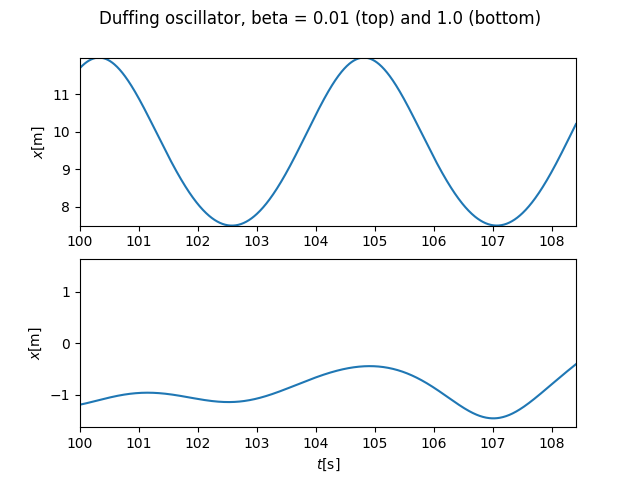

Animate time series from t=110294 with 1102945 frames


In [8]:
anim = tsanim([(t, x) for x in xs])
#anim.save('animations/duffing-test.mp4', writer='ffmpeg')

In [10]:
anim.save('animations/duffing-oscillator-nonlinearity-comparison.mp4', writer='ffmpeg')